In [1]:
from GeoToolkit.Mag import Mag, ProblemSetter, MathUtils, Simulator, DataIO
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator

import numpy as np

In [5]:
dataset = DataIO.fetchData(path=r"C:\Users\DominiqueFournier\Downloads\Forward Modelling\Forward Modelling", localCloud='Local')
display(dataset)

interactive(children=(RadioButtons(description='File Type:', options=('Local', 'Cloud'), value='Local'), Text(…

In [6]:
# dataset.result[0].set_gaussian_filter(100)
selection = Simulator.setDataExtentWidget(dataset.result[0])
display(selection)

interactive(children=(FloatSlider(value=335762.75, continuous_update=False, description='East', max=345725.187…

In [4]:
rtp = Simulator.dataGridGeoref(selection.result)
display(rtp)

interactive(children=(Dropdown(description='ColorMap', index=3, options=('viridis', 'plasma', 'magma', 'Spectr…

In [5]:
Simulator.gridFiltersWidget(rtp.result)

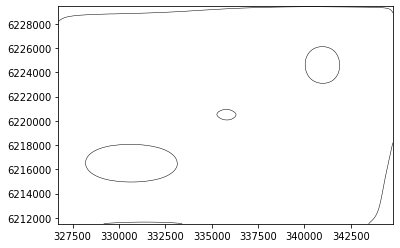

In [20]:
grid = selection.result


tilt = grid.tiltAngle

contours = [0]
# Contour the zero and keep
axs = plt.subplot()
CS = axs.contour(
            grid.hx, grid.hy, tilt, len(contours), levels=contours,
            colors='k', linewidths=0.5
        )


In [21]:
# Create a new grid with the tilt as property
# gridTilt = DataIO.dataGrid()
# gridTilt._values = selection.result.tiltAngle
# gridTilt.limits = selection.result.limits
# gridTilt.nx, gridTilt.ny = selection.result.nx, selection.result.ny
# gridTilt.dx, gridTilt.dy = selection.result.dx, selection.result.dy
# gridTilt.x0, gridTilt.y0 = selection.result.x0, selection.result.y0

In [22]:
# Simulator.gridFiltersWidget(gridTilt)

In [41]:
(grad_tilt[0]**2. + grad_tilt[1]**2. + 1e-8)**0.5




array([[0.00641352, 0.00632459, 0.00622683, ..., 0.00329693, 0.00362733,
        0.00381504],
       [0.00533171, 0.00527308, 0.00520777, ..., 0.00329751, 0.00355219,
        0.00367597],
       [0.00333528, 0.00331855, 0.00329998, ..., 0.00327949, 0.00346201,
        0.003529  ],
       ...,
       [0.00360732, 0.00361587, 0.00361412, ..., 0.00572967, 0.00567538,
        0.00572006],
       [0.00400259, 0.00394417, 0.0038731 , ..., 0.00536704, 0.00563647,
        0.00621301],
       [0.00419997, 0.00408405, 0.00395572, ..., 0.00518387, 0.00578284,
        0.00676692]])

In [42]:
# Compute tilt angle derivative
grad_tilt = np.gradient(grid.tiltAngle, grid.dx, grid.dy)

THD_tilt = (grad_tilt[0]**2. + grad_tilt[1]**2. + 1e-8)**0.5

gridTilt = DataIO.dataGrid()
gridTilt._values = THD_tilt
gridTilt.limits = selection.result.limits
gridTilt.nx, gridTilt.ny = selection.result.nx, selection.result.ny
gridTilt.dx, gridTilt.dy = selection.result.dx, selection.result.dy
gridTilt.x0, gridTilt.y0 = selection.result.x0, selection.result.y0

Simulator.dataHillsideWidget(gridTilt)

In [43]:
tri2D = Delaunay(gridTilt.gridCC[:, :2])
# Compute tilt angle derivative
F = LinearNDInterpolator(tri2D, THD_tilt.flatten(order='F'))                           
        
estimated_z = []
for segs, level in zip(CS.allsegs, CS.levels):

    for poly in segs:
        
        
        z = 1./F(poly[:, 0], poly[:, 1])
        
        estimated_z += [np.c_[poly , z]]
        
#         print(segs)
# #                 temp += [poly]
# #                 attributes += [level]
                
                

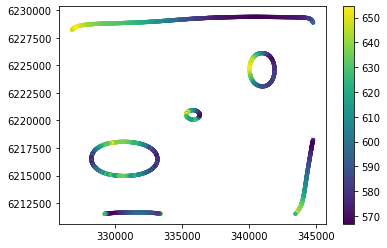

In [44]:
axs = plt.subplot()

for mat in estimated_z:
    plt.scatter(mat[:, 0], mat[:, 1], 10, mat[:, 2], )
    


plt.colorbar()


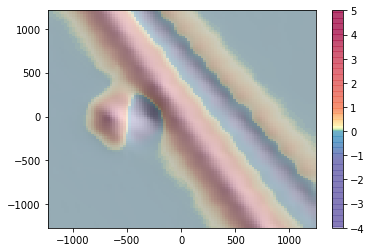

In [11]:
# THD = np.zeros_like(grid.values)
# THD[:-1,:] = ((grid.values[:-1,:] - grid.values[1:,:])/25)**2.
# THD[:,:-1] += ((grid.values[:, :-1] - grid.values[:, 1:])/25)**2.
# THD[THD==0] = THD.max()
# THD **= 0.5





In [31]:
THDT = np.zeros_like(gridTilt.values)
THDT[:-1,:] = ((gridTilt.values[:-1,:] - gridTilt.values[1:,:])/25)**2.
THDT[:,:-1] += ((gridTilt.values[:, :-1] - gridTilt.values[:, 1:])/25)**2.
THDT[THDT==0] = THDT.max()
THDT **= 0.5


In [32]:
tri2D = Delaunay(gridTilt.gridCC[:, :2])
F = LinearNDInterpolator(tri2D, THDT.flatten(order='F'))                           
        
estimated_z = []
for segs, level in zip(CS.allsegs, CS.levels):

    for poly in segs:
        
        
        z = 1./F(poly[:, 0], poly[:, 1])
        
        estimated_z += [np.c_[poly , z]]

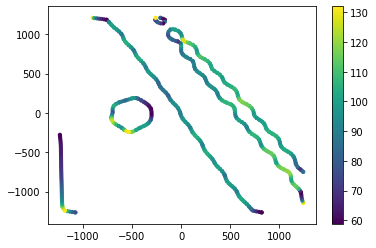

In [33]:
axs = plt.subplot()

for mat in estimated_z:
    plt.scatter(mat[:, 0], mat[:, 1], 10, mat[:, 2], )
    


plt.colorbar()


In [7]:
Simulator.gridTilt2Depth(selection.result)